# Práctica 6: Word Embeddingd pt. 2

In [1]:
!pip install numpy==1.24.4

## Práctica 6.2: Reducción de la dimensionalidad

Hay varios métodos que podemos aplicar para reduccir la dimensionalidad de nuestros vectores y asi poder visualizar en un espacio de menor dimensionalidad como estan siendo representados los vectores.
- PCA (Principal Component Analysis)
- T-SNE (t-Distributed Stochastic Neighbor Embedding)
- SVD (Singular Value Decomposition)

### 1) Escoger un modelo pre-entrenado visto en clase o entrenar uno propio y cargarlo en memoria
    - [Carpeta con los modelos 📕](https://drive.google.com/drive/folders/1reor2FGsfOB6m3AvfCE16NOHltAFjuvz?usp=sharing)

In [2]:
from gensim.models import word2vec, FastText

In [3]:
def load_model(filename):
    try:
        print(f"Searching for model {filename}")
        model = word2vec.Word2Vec.load(filename)
        print("Model found! Loading...")
        model.save(model_name)
        print("Done")
        return model
    except Exception as e:
        print(f"Modelo {filename} not found. Exception: {e}")

In [4]:
model_name = "models/eswiki-large-vs500-w6-SKIP_GRAM.model"
skip_gram_500 = load_model(model_name)

Searching for model models/eswiki-large-vs500-w6-SKIP_GRAM.model
Model found! Loading...
Done


In [5]:
def report_stats(model):
    print("Number of words in the corpus used for training the model: ", model.corpus_count)
    print("Number of words in the model: ", len(model.wv.index_to_key))
    print("Time [s], required for training the model: ", model.total_train_time)
    print("Count of trainings performed to generate this model: ", model.train_count)
    print("Length of the word2vec vectors: ", model.vector_size)
    print("Applied context length for generating the model: ", model.window)

In [6]:
report_stats(skip_gram_500)

Number of words in the corpus used for training the model:  1072961
Number of words in the model:  211340
Time [s], required for training the model:  383.3038097620006
Count of trainings performed to generate this model:  1
Length of the word2vec vectors:  500
Applied context length for generating the model:  6


### 2) Aplicar los 3 algoritmos de reduccion de dimensionalidad
    - Reducir a 2d
    - Plotear 100 vectores al azar
        - Se deben plotear los mismos 100 en los tres casos
    - Analizar y comparar las topologías que se generan con cada algoritmo

In [43]:
model = skip_gram_500
word_vectors = model.wv.vectors

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_from_indices(vectors, indices, model):
    plt.scatter(vectors[indices, 0], vectors[indices, 1])
    vocabulary = model.wv.index_to_key
    words = [vocabulary[i] for i in indices]
    for i, word in enumerate(words):
        plt.annotate(word, xy=(vectors[indices[i], 0], vectors[indices[i], 1]))
    plt.show()

def get_random_indices(vectors, n):
    return np.random.choice(vectors.shape[0], n, replace=False)

def plot_n_random(vectors, n, model):
    random_indices = get_random_indices(vectors, n)
    plot_from_indices(vectors, random_indices, model)

#### PCA (Principal Component Analysis)

In [50]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)
pca_vectors = pca.fit_transform(word_vectors)

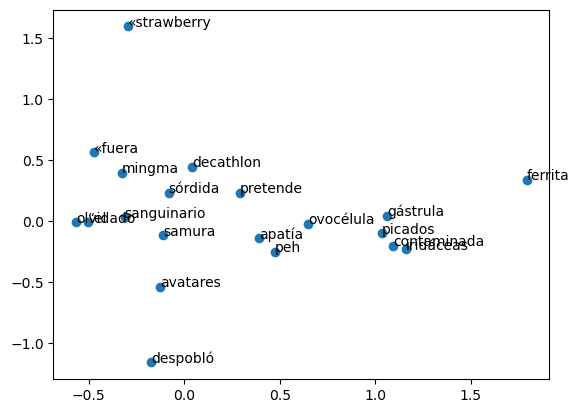

In [47]:
plot_n_random(pca_vectors, 20, model)

#### T-SNE (t-Distributed Stochastic Neighbor Embedding)

In [52]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_vectors = tsne.fit_transform(word_vectors)

KeyboardInterrupt: 

In [ ]:
plot_n_random(tsne_vectors, 20, model)

#### SVD (Singular Value Decomposition)

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)  # You can adjust the number of components
print("Reducing the word vectors with SVD...")
svd_vectors = svd.fit_transform(word_vectors)
print("Done!")

#### Comparando los embeddings de dimensionalidad reducida

In [ ]:
random_indices = get_random_indices(word_vectors, 50, model))

In [ ]:
# PCA:
plot_from_indices(pca_vectors, random_indices, model)

In [ ]:
# T-SNE:
plot_from_indices(tsne_vectors, random_indices, model)

In [ ]:
# SVD:
plot_from_indices(svd_vectors, random_indices, model)